In [1]:
library(IRdisplay)
library(Cairo)

library(data.table)
library(arrow)
library(ggplot2)
library(cowplot)
library(ggrepel)
library(ggthemes)
library(ggpubr)
library(ggtext)
library(patchwork)
library(grid)
library(gridExtra)
library(scales)
library(stringr)
library(RColorBrewer)
library(yaml)
library(plyr)
library(tidyverse)
library(png)
library(rstatix)


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘ggthemes’


The following object is masked from ‘package:cowplot’:

    theme_map



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()      masks plyr::arrange()
✖ dplyr::between()      masks data.table::between()
✖ readr::col_factor()   masks scales::col_factor()
✖ dplyr::combine()      masks gr

In [2]:
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res=200)

In [3]:
# set global plot parameters
FONTSIZE = 12
THEME = theme_cowplot(font_size = FONTSIZE, font_family = 'Helvetica') + theme(plot.tag = element_text(face = "bold"))

In [4]:
base_path = '/data/nasif12/home_if12/tsi/kipoi_expression_prediction/etc/enformer_bins/set2_norm'
enrichment_df = paste(base_path, 'enrichment.parquet', sep='/') %>% open_dataset() %>% collect() %>% as.data.table()
veff_df = paste(base_path, 'veff_bin.parquet', sep='/') %>% open_dataset() %>% collect() %>% as.data.table()

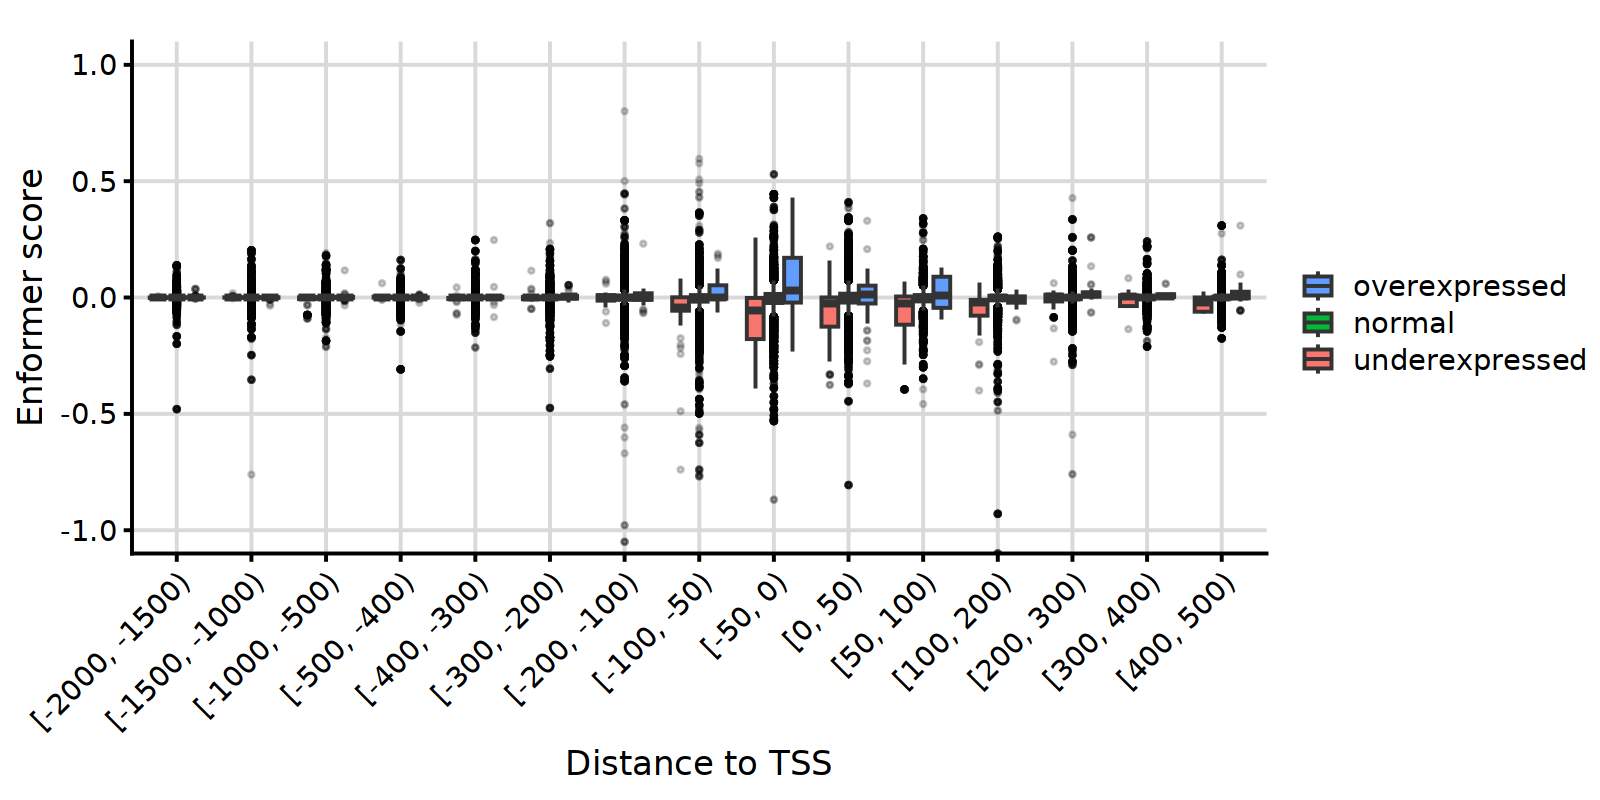

In [5]:
p1 = (
    ggplot(veff_df, aes(x=`rel_var_pos_bin_label`, fill=`outlier_state`))
    + geom_boxplot(aes(y=`veff_score`), outlier.size=0.5, outlier.color='#00000032')
    + THEME
    + theme(
        axis.text.x=element_text(angle = 45, hjust = 1),
    )
    + labs(
        x="Distance to TSS", 
        y="Enformer score",
        color="",
        fill="",
        title=element_blank(),
    )
    + coord_cartesian(ylim=c(-1, 1))
    + guides(size='none', fill = guide_legend(reverse = TRUE))
    + background_grid()
    )
p1

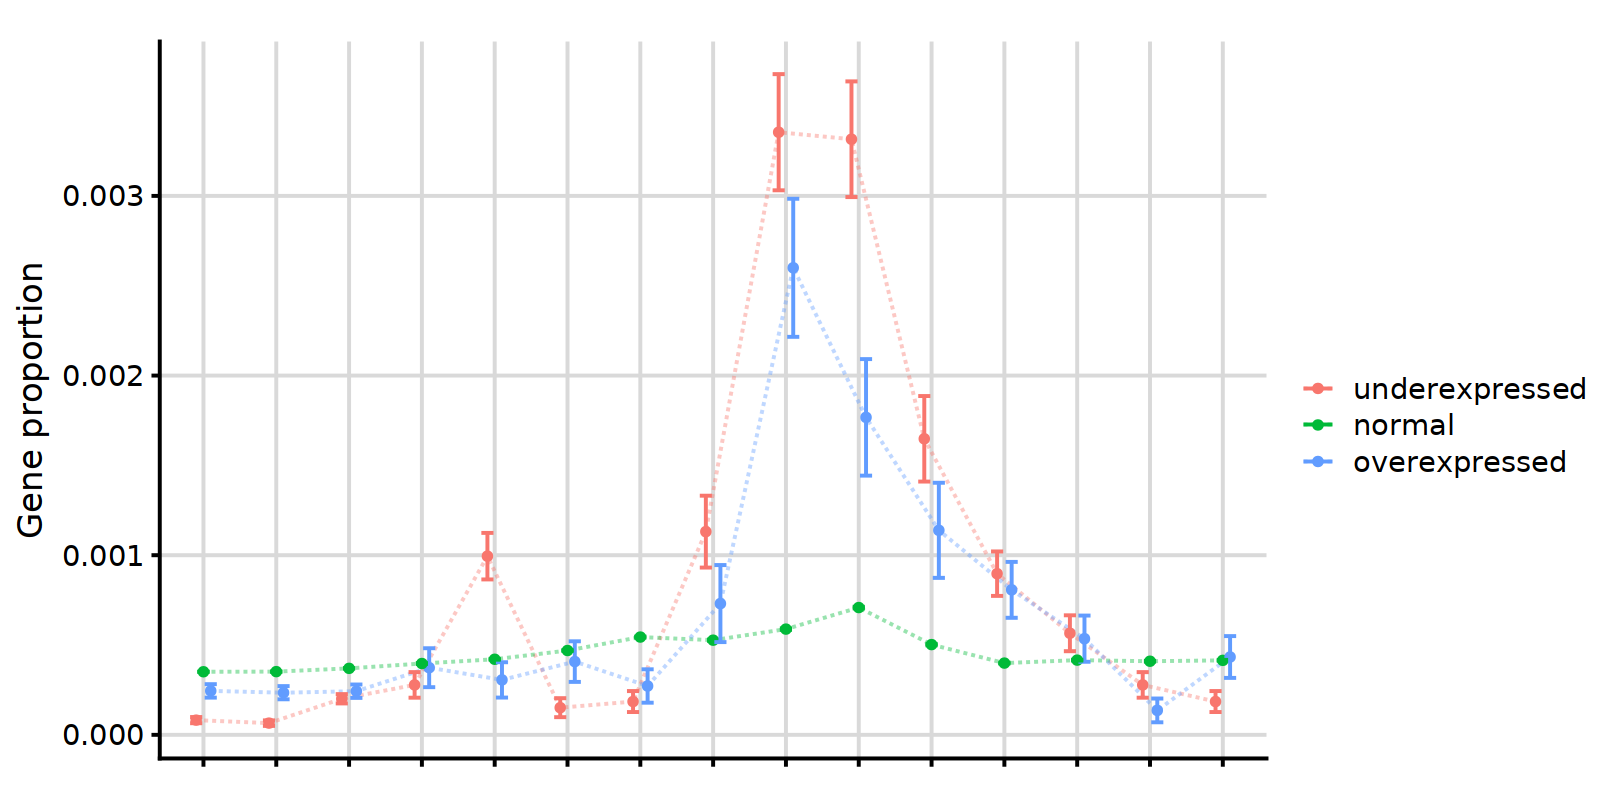

In [6]:
dodge_width = 0.3
p2 = (
    ggplot(enrichment_df, aes(x=`rel_var_pos_bin_label`, y=`enrichment`, fill=`outlier_state`, color=`outlier_state`))
    + geom_line(aes(group=`outlier_state`), linetype="dashed", position = position_dodge(width = dodge_width),  alpha=0.4)
    + geom_point(position = position_dodge(width = dodge_width), size=1)
    + geom_errorbar(aes(ymin=`ci_low`, ymax=`ci_high`), width=0.5, position = position_dodge(width = dodge_width))
    + THEME
    + theme(
        axis.text.x=element_blank(),
    )
    + labs(
        x=element_blank(), 
        y="Gene proportion",
        color="",
        fill="",
        title=element_blank(),
    )
    + background_grid()
)
p2

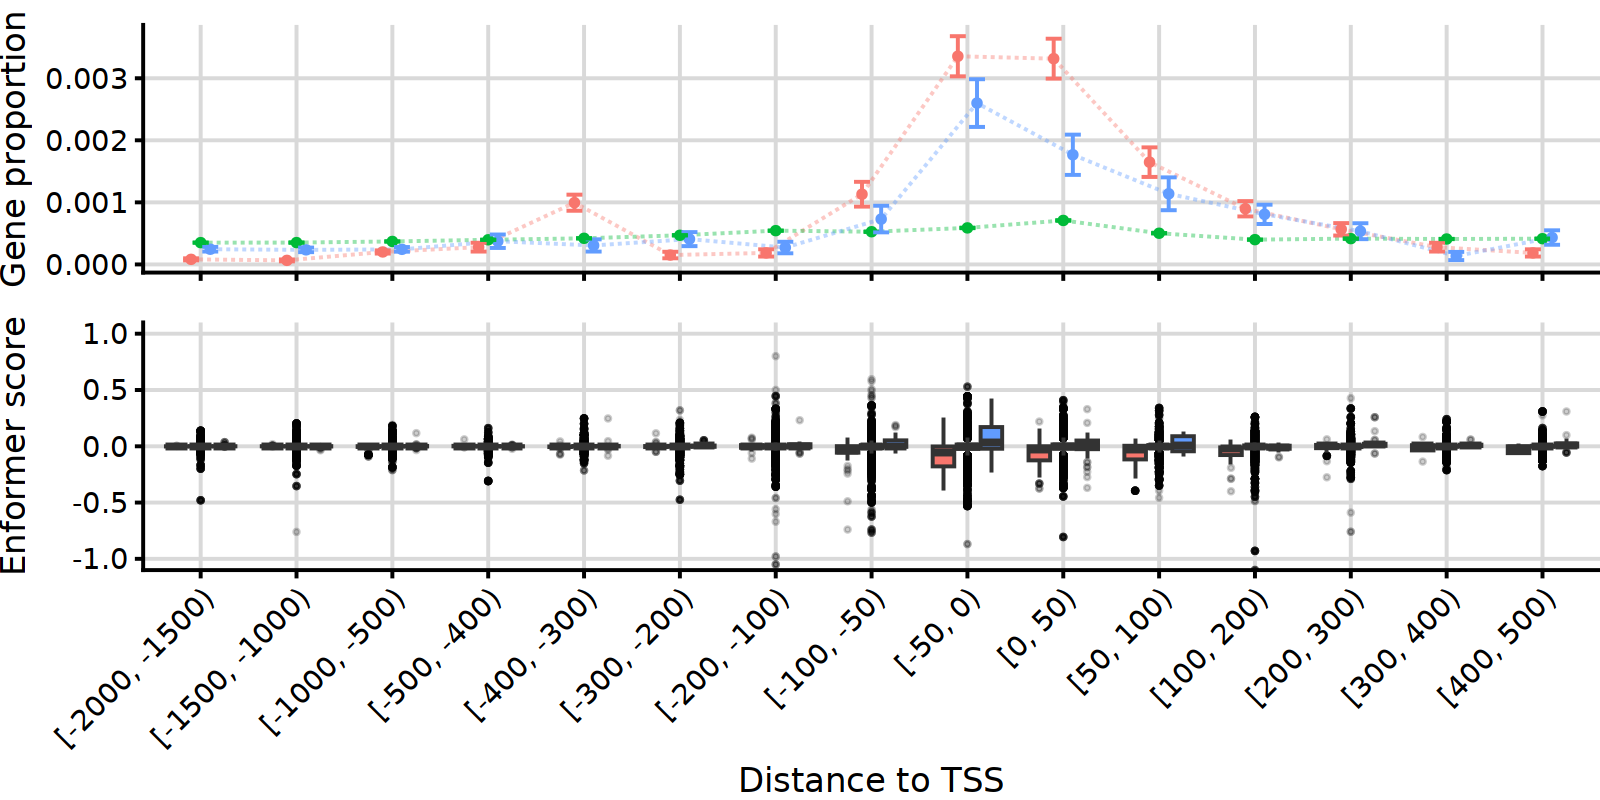

In [7]:
p3 <- (p2 / p1 ) & theme(plot.margin = margin(0,0,0,0), legend.position = 'none') 
p3

[1] "Saving to /data/nasif12/home_if12/tsi/kipoi_expression_prediction/etc/enformer_bins/set2_norm/enformer_enrichment..."


Warning message:
“Using ragg device as default. Ignoring `type` and `antialias` arguments”


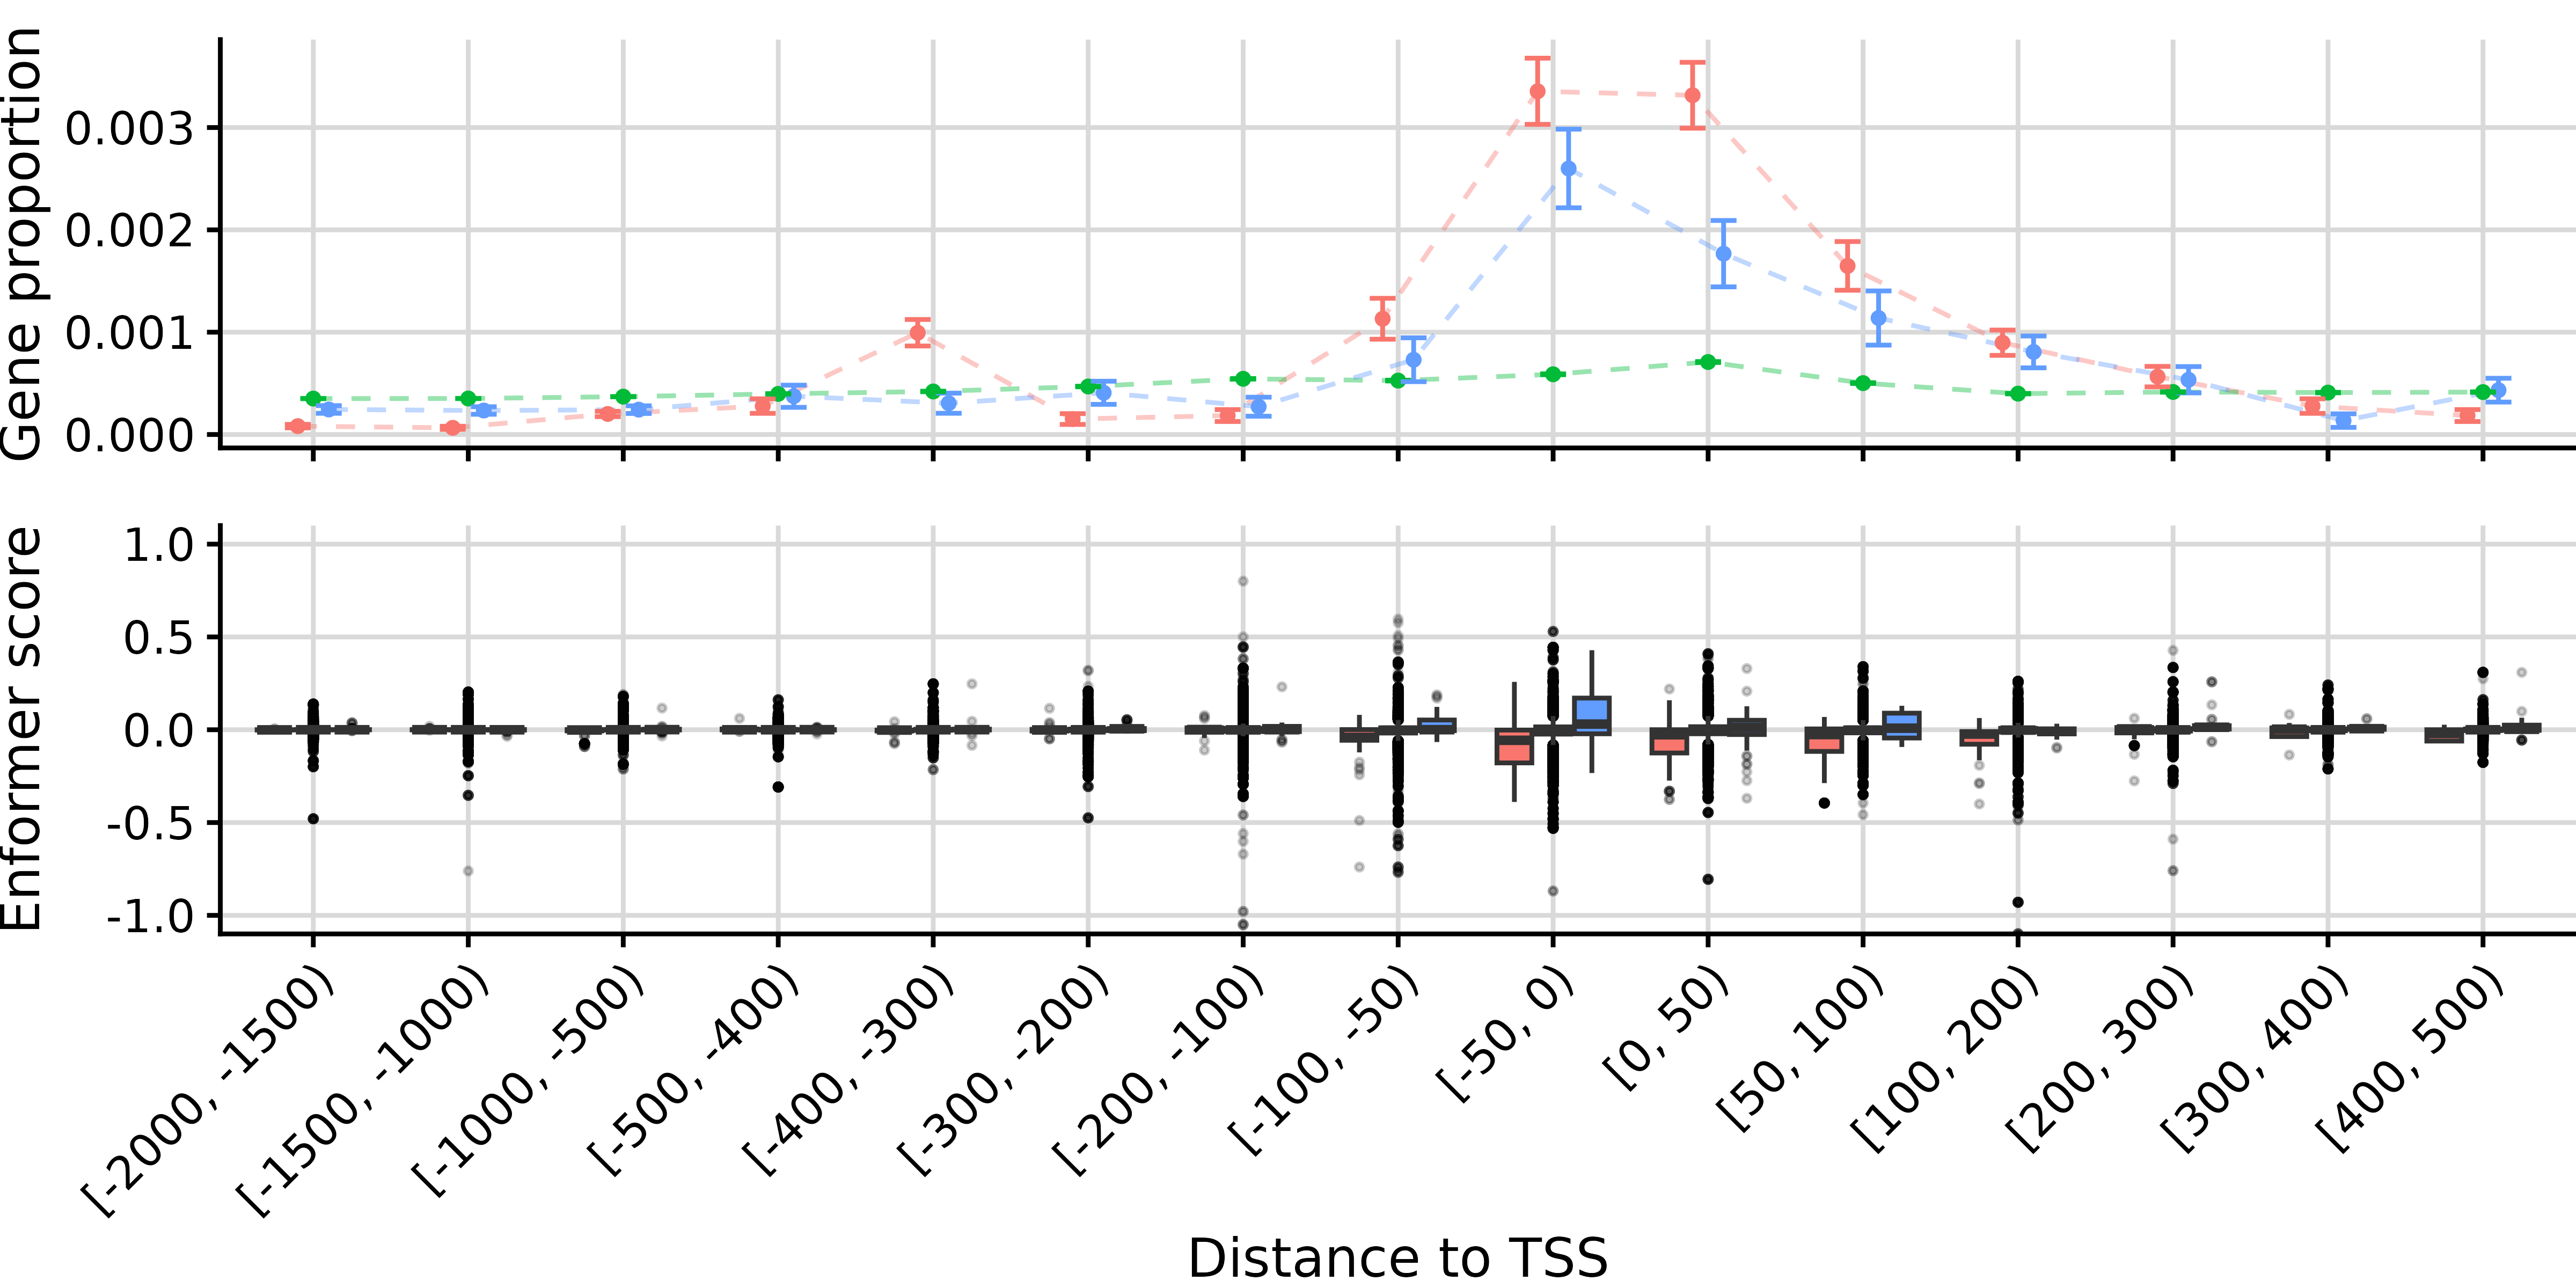

In [8]:
width=8
height=4

path = paste(base_path, 'enformer_enrichment', sep='/')
print(paste0("Saving to ", path, "..."))
ggsave(paste0(path, ".png"), p3, width = width, height = height, dpi=600, type = "cairo")
ggsave(paste0(path, ".pdf"), p3, width = width, height = height, dpi=600, device=cairo_pdf)
ggsave(paste0(path, ".svg"), p3, width = width, height = height, dpi=600, device=svg)

display_png(file=paste0(path, ".png"))